# Base de datos IMDB

**Eres parte del equipo de Datos** 🤓 de una StartUp en su primera etapa de inversión que se dedica a la venta de articulos colección de las peliculas 🎬 y series de TV 📺 que aparecen en los **ranking top** 🏆 de U.S.A.  

Por ahora **la API** 🤖 que utilizan para extraer los datos de las peliculas top de IMDb **continua caída** por [las fallas de AWS](https://www.theguardian.com/technology/2021/dec/07/amazon-web-services-outage-hits-sites-and-apps-such-as-imdb-and-tinder) 😓 del 7 de Diciembre del 2021, por lo que **se requiere que se establezca una alternativa**.

**Tú como lider** del equipo de interns **has definido el plan de obtener** la lista de las peliculas target **a partir del Scrapping** 🦾 de las paginas de los top del sitio web **de IMDb** 🎬.

# Web Scrapping con BeautifulSoup y Python

# Instrucciones

Deberás compartirle al equipo de producción las listas de peliculas y shows de las siguientes categorías generando un archivo CSV:

- [Top 10 Most Popular Movies](https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm)
- [Top 10 de peliculas del 2021 al 2018](https://www.imdb.com/chart/top?sort=us,desc&mode=simple&page=1)
- [Top 10 de TV Shows](https://www.imdb.com/chart/toptv/?sort=us,desc&mode=simple&page=1)

Bibliotecas

In [111]:
#Bibliotecas a emplear
#!pip install beautifulsoup4
import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt

**Top 10 Most Popular Movies** [*](https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm)

In [8]:
top_100_popular_movies= requests.get('https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm') #Obtener el contenido web de la primera página web
soup = BeautifulSoup(top_100_popular_movies.text) 

In [9]:
print(soup.title.text) #Titulo de la pagina Web

Most Popular Movies - IMDb


In [100]:
rows = soup.find_all('tr')  #Filas de la tabla de la página
print(len(rows))   #En total son 101 filas, la fila con los nombres de la columna y las 100 peliculas

101


In [171]:
rows=soup.find_all('tr') #Filas de la página
data = []  #Arreglo donde se creará el dataFrame

for i in range(1,len(rows)):    #1-101 para tomar en cuenta todas las peliculas del listado

  datos=[] #Lista que representa las filas del arreglo data. En ella se encuentra la información de las peliculas.

  ranking=i   #El listado va en orden ascendente
  datos.append(ranking) #Agregar rank de la pelicula

  #Movie (Titulo)
  a_movie= rows[i].find_all('a')
  movie=a_movie[1].text 
  datos.append(movie) #Agregar nombre de la pelicula

  #Year (Año está entre parentesis)
  span_year= rows[i].find_all('span')
  year=span_year[5].text
  year=((year.split("(")[1]).split(")")[0]) #Dividir texto del año entre los parentesis, tomar solo la posición con el año
  datos.append(int(year))  #Convertir str a int, agregar a lista datos
  
  #Raking IMBd
  rank_m=rows[i].find('strong')
  if not rank_m:
    datos.append("")  #Algunas peliculas no cuentan con ranking, en esos casos se dejará campo vacio.
  else:
    ran=rank_m.text  #Ranking otorgado por la IMBd
    datos.append(float(ran))  #Convertir str a float para agregarlo a la lista datos
  
  data.append(datos) #Incluir fila a arreglo
  

print(data)  #Arreglo creado

[[1, 'Day Shift', 2022, 6.1], [2, 'Prey', 2022, 7.2], [3, 'Bullet Train', 2022, 7.5], [4, 'Nope', 2022, 7.2], [5, 'Top Gun: Maverick', 2022, 8.5], [6, 'The Menu', 2022, ''], [7, 'Elvis', 2022, 7.6], [8, 'Thirteen Lives', 2022, 7.8], [9, 'The Gray Man', 2022, 6.5], [10, 'Orphan: First Kill', 2022, 6.0], [11, 'Purple Hearts', 2022, 6.7], [12, 'The Black Phone', 2021, 7.0], [13, 'Look Both Ways', 2022, 6.3], [14, 'Grease', 1978, 7.2], [15, 'Beast', 2022, 5.9], [16, 'Thor: Love and Thunder', 2022, 6.7], [17, 'Bodies Bodies Bodies', 2022, 6.7], [18, 'Vengeance', 2022, 6.9], [19, 'Uncharted', 2022, 6.4], [20, 'Secret Headquarters', 2022, 4.9], [21, 'Laal Singh Chaddha', 2022, 5.0], [22, 'Lightyear', 2022, 5.8], [23, 'Fall', 2022, 6.5], [24, 'Top Gun', 1986, 6.9], [25, 'Where the Crawdads Sing', 2022, 7.1], [26, 'Everything Everywhere All at Once', 2022, 8.2], [27, 'Jurassic World Dominion', 2022, 5.7], [28, 'X', 2022, 6.6], [29, 'Luck', 2022, 6.3], [30, 'Licorice Pizza', 2021, 7.2], [31, '36

In [104]:
data_movie_100=pd.DataFrame(data)
data_movie_100.columns=['Ranking','Movie','Year','IMBd Ranking'] #Cambiar nombre a las columnas
data_movie_100.head(20) #Mostrar los primeros 20 resultados

,Ranking,Movie,Year,IMBd Ranking
0,1,Day Shift,2022,6.1
1,2,Prey,2022,7.2
2,3,Bullet Train,2022,7.5
3,4,Nope,2022,7.2
4,5,Top Gun: Maverick,2022,8.5
5,6,The Menu,2022,
6,7,Elvis,2022,7.6
7,8,Thirteen Lives,2022,7.8
8,9,The Gray Man,2022,6.5
9,10,Orphan: First Kill,2022,6.0


Text(0.5, 1.0, 'Most Popular Movies - Year')

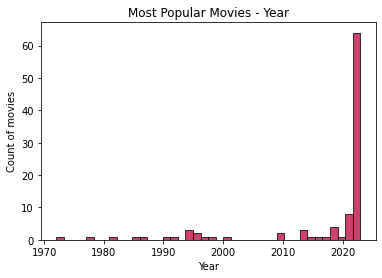

In [140]:
#Creación de histograma para representar el número de peliculas por año
sns.histplot(data_movie_100["Year"], color='#be013c')
plt.xlabel("Year")
plt.ylabel('Count of movies')
plt.title('Most Popular Movies - Year')

Text(0.5, 1.0, 'Most Popular Movies - Ranking IMDb')

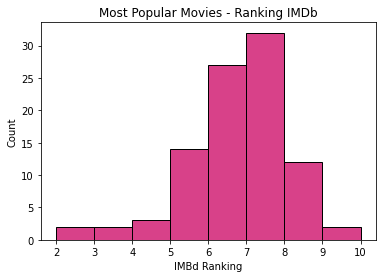

In [152]:
#Visualización de la distribución de ranking por peliculas
sns.histplot(data_movie_100["IMBd Ranking"],bins=10, color='#cb0162')
plt.xlabel("IMBd Ranking")
plt.ylabel('Count')
plt.title('Most Popular Movies - Ranking IMDb')

La mayoría de las peliculas cuenta con una calificación entre 7 a 8 de acuerdo a IMBd users.

In [133]:
#Convertir dataFrame a un archivo csv
data_movie_100.to_csv("data_movie_100.csv")


**Top 10 de peliculas del 2021 al 2018**   [*](https://www.imdb.com/chart/top?sort=us,desc&mode=simple&page=1)

In [30]:
top_movies_250 = requests.get('https://www.imdb.com/chart/top?sort=us,desc&mode=simple&page=1')
soup_250 = BeautifulSoup(top_movies_250.text)  #Obtener el código de la página

In [31]:
print(soup_250.title.text)  #Titulo de la página

Top 250 Movies - IMDb


In [173]:
rows_250 = soup_250.find_all('tr') #Numéro de filas de la página
print(len(rows_250))  #251, 1 para el nombre de las columnas y 250 para las peliculas

251


In [174]:
rows_250 = soup_250.find_all('tr') #Filas
data_250 = [] #Arreglo donde se guarda la información de las series

for i in range(1,len(rows_250)):

  movies=[] #Lista con la información de la pelicula

  #Ranking
  cd=rows_250[i].find_all('td')  
  cd_ran=cd[1].text  #Texto donde está el ranking de la pelicula
  ran=cd_ran.replace("\n","").split("  ") #Quitar texto extra y separación del str en un listado
  ranking=ran[3].replace(".","") #Obtención del ranking en formato de texto
  ranking=int(ranking)  #Convertir str a int
  movies.append(ranking)

  #Titulo
  name=rows_250[i].find_all('a')
  movie=name[1].text
  movies.append(movie)  #Agregar nombre de la pelicula

  #Year
  year_250= rows_250[i].find_all('span')
  year=year_250[5].text #Año entre parentesis en formato texto
  year=((year.split("(")[1]).split(")")[0]) #Dividir texto en una lista para obtener el año
  movies.append(int(year))  #Agregar año en forma int 

  #IMBd Score
  a=rows_250[i].find('strong')
  if not a:       #Criterio para las peliculas que no tengan score
    datos.append("")  #Se pone celda vacia
  else:
    ran=a.text #Ranking de la IMBd users
    movies.append(float(ran))  #Transformar ranking a float

  data_250.append(movies) #Incluir fila a arreglo
  
print(data_250) #Arreglo creado

[[57, 'Top Gun: Maverick', 2022, 8.4], [179, 'Everything Everywhere All at Once', 2022, 8.1], [133, 'Spider-Man: No Way Home', 2021, 8.2], [246, 'Jai Bhim', 2021, 8.0], [121, 'Hamilton', 2020, 8.2], [131, 'The Father', 2020, 8.2], [122, '1917', 2019, 8.2], [197, 'Klaus', 2019, 8.1], [72, 'Joker', 2019, 8.3], [212, 'Ford v Ferrari', 2019, 8.0], [35, 'Parasite', 2019, 8.5], [80, 'Avengers: Endgame', 2019, 8.3], [69, 'Spider-Man: Into the Spider-Verse', 2018, 8.3], [132, 'Green Book', 2018, 8.2], [93, 'Capernaum', 2018, 8.3], [65, 'Avengers: Infinity War', 2018, 8.4], [76, 'Coco', 2017, 8.3], [166, 'Three Billboards Outside Ebbing, Missouri', 2017, 8.1], [219, 'Logan', 2017, 8.0], [127, 'Dangal', 2016, 8.2], [195, 'Hacksaw Ridge', 2016, 8.1], [83, 'Your Name.', 2016, 8.3], [245, 'The Handmaiden', 2016, 8.0], [200, 'Room', 2015, 8.1], [217, 'Spotlight', 2015, 8.0], [160, 'Inside Out', 2015, 8.1], [201, 'Mad Max: Fury Road', 2015, 8.1], [27, 'Interstellar', 2014, 8.6], [186, 'Gone Girl', 20

In [175]:
data_movies_250=pd.DataFrame(data_250) #Convetir arreglo a dataFrame
data_movies_250.columns=['Ranking','Movie','Year','IMBd Ranking'] #Cambiar nombre de las columnas
data_movies_250.sort_values(['Ranking']).head(20) #Visualización de las primeras mejores 20 peliculas, basandonos en el ranking

,Ranking,Movie,Year,IMBd Ranking
124,1,The Shawshank Redemption,1994,9.2
182,2,The Godfather,1972,9.2
56,3,The Dark Knight,2008,9.0
178,4,The Godfather Part II,1974,9.0
211,5,12 Angry Men,1957,8.9
129,6,Schindler's List,1993,8.9
77,7,The Lord of the Rings: The Return of the King,2003,8.9
127,8,Pulp Fiction,1994,8.8
88,9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8
187,10,"The Good, the Bad and the Ugly",1966,8.8


Text(0.5, 1.0, 'Top 250 Movies - Year')

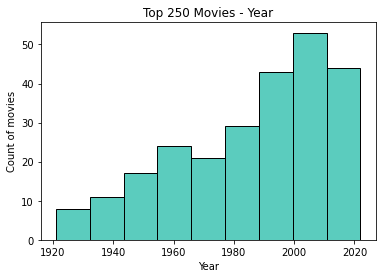

In [146]:
#Creación de histograma para representar el número de peliculas por año
sns.histplot(data_movies_250["Year"], color='#24bca8')
plt.xlabel("Year")
plt.ylabel('Count of movies')
plt.title('Top 250 Movies - Year')

Text(0.5, 1.0, 'Top 250 Movies - Ranking IMDb')

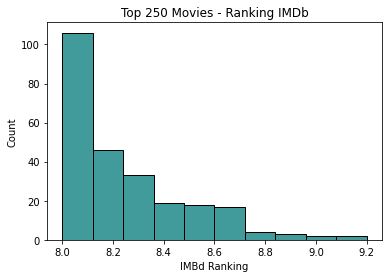

In [153]:
#Distribución de ranking por peliculas
sns.histplot(data_movies_250["IMBd Ranking"],bins=10, color='#017a79')
plt.xlabel("IMBd Ranking")
plt.ylabel('Count')
plt.title('Top 250 Movies - Ranking IMDb')

Del anterior histograma se puede ver que las calificaciones varían entre el 8 a 9.2. La mayor cantidad de peliculas, más de 100, cuentan con una calificación de 8 a 8.1

In [99]:
#Convertir dataFrame a un archivo csv
data_movies_250.to_csv("data_movies_250.csv")

**IMDb Top 250 TV - IMDb**   [*](https://www.imdb.com/chart/toptv/?sort=us,desc&mode=simple&page=1)

In [154]:
top_series_250 = requests.get('https://www.imdb.com/chart/toptv/?sort=us,desc&mode=simple&page=1')
soup_series = BeautifulSoup(top_series_250.text)

In [155]:
print(soup_series.title.text) #Titulo de la pagina Web

IMDb Top 250 TV - IMDb


In [157]:
rows_series=soup_series.find_all('tr') #Filas de la página
print(len(rows_series))  #250 filas correspondientes al nombre de las columnas y las 250 series enlistadas

251


In [158]:
rows_series[0] #La primera fila de la página tiene el nombre de las columnas

<tr>
<th></th>
<th>Rank &amp; Title</th>
<th>IMDb Rating</th>
<th>Your Rating</th>
<th></th>
</tr>

In [183]:
rows_series=soup_series.find_all('tr') #Filas de la página
series_tv =[]  #Arreglo a partir del cual se crea el dataFrame

for i in range(1,len(rows_series)):    #No se toma en cuenta la primera fila

  serie=[] #Lista que representa las filas del arreglo data. En ella se encuentra la información de las peliculas.

  #Ranking
  rank_tv=rows_series[i].find_all('td')  
  r_tv=rank_tv[1].text  #Texto donde está el ranking 
  ran=r_tv.replace("\n","").split("  ") #Quitar texto extra y separación del str en un listado
  ranking=ran[3].replace(".","") #Obtención del ranking en formato de texto
  ranking=int(ranking)  #Convertir str a int
  serie.append(ranking) #Agregar rank de la pelicula

  #TV (Titulo)
  name_tv= rows_series[i].find_all('a')
  tv=name_tv[1].text 
  serie.append(tv) #Agregar nombre de la pelicula

  #Year (Año está entre parentesis)
  span_year= rows_series[i].find_all('span')
  year=span_year[5].text
  year=((year.split("(")[1]).split(")")[0]) #Dividir texto del año entre los parentesis, tomar solo la posición con el año
  serie.append(int(year))  #Convertir str a int, agregar a lista datos
  
  #Raking IMBd
  rank_imbd=rows_series[i].find('strong')
  if not rank_imbd:  #Criterio para las peliculas que no tengan score
    serie.append("") #Se pone celda vacia
  else:
    ran=rank_imbd.text  #Ranking otorgado por la IMBd
    serie.append(float(ran))  #Convertir str a float para agregarlo a la lista datos
  
  series_tv.append(serie) #Incluir fila a arreglo
  

print(series_tv)  #Arreglo creado

[[181, 'The Offer', 2022, 8.5], [132, 'Heartstopper', 2022, 8.6], [225, 'SPY×FAMILY', 2022, 8.4], [106, 'Severance', 2022, 8.6], [246, 'Rocket Boys', 2022, 8.4], [112, '1883', 2021, 8.6], [36, 'The Beatles: Get Back', 2021, 8.9], [24, 'Arcane', 2021, 8.9], [151, 'Dopesick', 2021, 8.5], [41, "Clarkson's Farm", 2021, 8.9], [242, 'Mare of Easttown', 2021, 8.4], [125, 'Aspirants', 2021, 8.6], [95, 'Invincible', 2021, 8.6], [134, "It's a Sin", 2021, 8.6], [84, 'As If', 2021, 8.7], [160, "The Queen's Gambit", 2020, 8.5], [23, 'Scam 1992: The Harshad Mehta Story', 2020, 9.0], [198, 'Jujutsu Kaisen', 2020, 8.5], [75, 'Ted Lasso', 2020, 8.7], [17, 'The Last Dance', 2020, 9.0], [108, 'Panchayat', 2020, 8.6], [171, 'Crash Landing on You', 2019, 8.5], [82, 'The Mandalorian', 2019, 8.7], [144, 'Primal', 2019, 8.5], [183, 'The Family Man', 2019, 8.5], [87, 'The Boys', 2019, 8.7], [97, 'Vinland Saga', 2019, 8.6], [102, 'Gullak', 2019, 8.6], [47, 'When They See Us', 2019, 8.8], [5, 'Chernobyl', 2019, 

In [184]:
data_tvs=pd.DataFrame(series_tv) #Convetir arreglo a dataFrame
data_tvs.columns=['Ranking','TV','Year','IMBd Ranking'] #Cambiar nombre de las columnas
data_tvs.sort_values(['Ranking']).head(20) #Visualización de las primeras mejores 20 peliculas, basandonos en el ranking

,Ranking,TV,Year,IMBd Ranking
57,1,Planet Earth II,2016,9.4
143,2,Breaking Bad,2008,9.4
151,3,Planet Earth,2006,9.4
185,4,Band of Brothers,2001,9.4
29,5,Chernobyl,2019,9.3
181,6,The Wire,2002,9.3
45,7,Blue Planet II,2017,9.2
159,8,Avatar: The Last Airbender,2005,9.2
93,9,Cosmos: A Spacetime Odyssey,2014,9.2
199,10,The Sopranos,1999,9.2


Text(0.5, 1.0, 'IMDb Top 250 TV - Year')

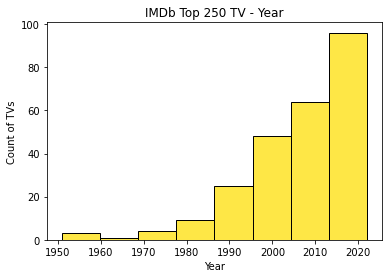

In [194]:
#Creación de histograma para representar el número de peliculas por año
sns.histplot(data_tvs["Year"], color='#fedf08', bins=8)
plt.xlabel("Year")
plt.ylabel('Count of TVs')
plt.title('IMDb Top 250 TV - Year')

Text(0.5, 1.0, 'IMDb Top 250 TV - Ranking IMDb')

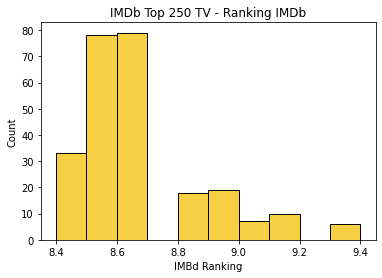

In [198]:
#Distribución de ranking por peliculas
sns.histplot(data_tvs["IMBd Ranking"],bins=10, color='#f5bf03')
plt.xlabel("IMBd Ranking")
plt.ylabel('Count')
plt.title('IMDb Top 250 TV - Ranking IMDb')

El ranking de peliculas varía del 8.4 a 9.4, la myor cantidad de tvs cuentan con una califiación de 8.4 a 8.7